# Project I | Deep Learning: Image Classification with CNN
### Task Description
Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

## Assessment Components

In [26]:
# imports
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

# Tensorflow Imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model


# Evaluation reports
from sklearn.metrics import classification_report, confusion_matrix

## 1. Data Preprocessing

- Data loading and preprocessing (e.g., normalization, resizing, augmentation).
- Create visualizations of some images, and labels.

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [13]:
# Normalize the pixel values to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels into one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

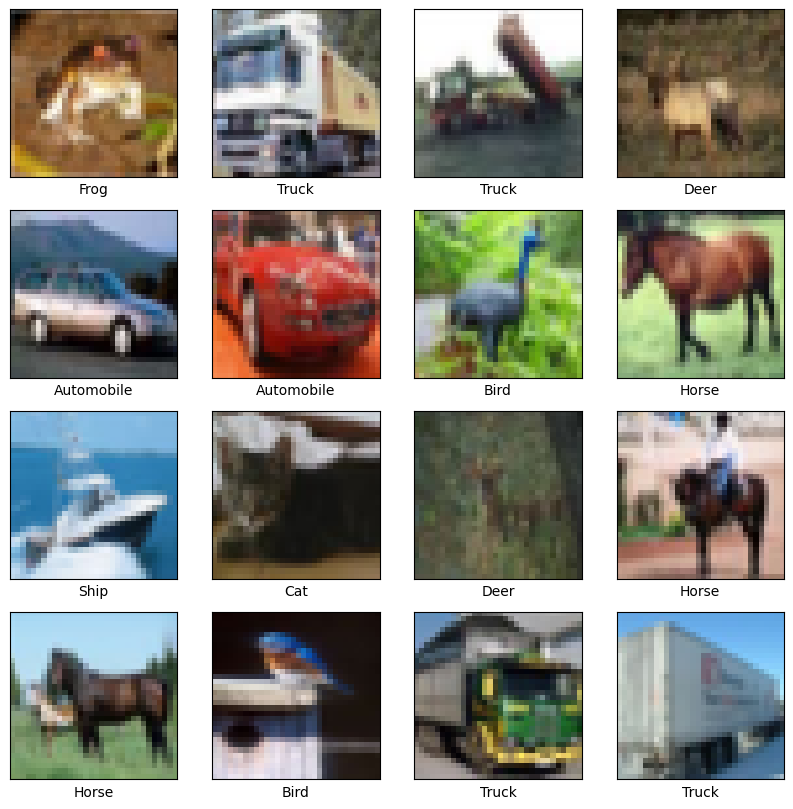

In [263]:
# Define CIFAR-10 class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Visualize a few training images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(16):  # Plot a 4x4 grid of images
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        # Show the corresponding label
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

plot_images(x_train, y_train, class_names)


## 2. Model Architecture

- Design a CNN architecture suitable for image classification.
- Include convolutional layers, pooling layers, and fully connected layers.

In [278]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_97 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,466 (2.10 MB)

 Trainable params: 551,018 (2.10 MB)

 Non-trainable params: 448 (1.75 KB)

## 3. Model Training

- Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
- tilize techniques such as early stopping to prevent overfitting.

In [ ]:
# Train the model with the split data
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

model.fit(x_train, y_train, 
          epochs=20, 
          batch_size=64, 
          validation_data=(x_test, y_test), 
          callbacks=[early_stopping, lr_scheduler])

## 4. Model Evaluation

- Evaluate the trained model on a separate validation set.
- Compute and report metrics such as accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix to understand model performance across different classes.

In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

In [242]:
# Classification and predictions
# Get predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

    airplane       0.88      0.82      0.85      1000
  automobile       0.91      0.93      0.92      1000
        bird       0.80      0.72      0.76      1000
         cat       0.66      0.71      0.68      1000
        deer       0.82      0.77      0.80      1000
         dog       0.77      0.74      0.76      1000
        frog       0.84      0.89      0.86      1000
       horse       0.82      0.89      0.86      1000
        ship       0.92      0.89      0.91      1000
       truck       0.86      0.92      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



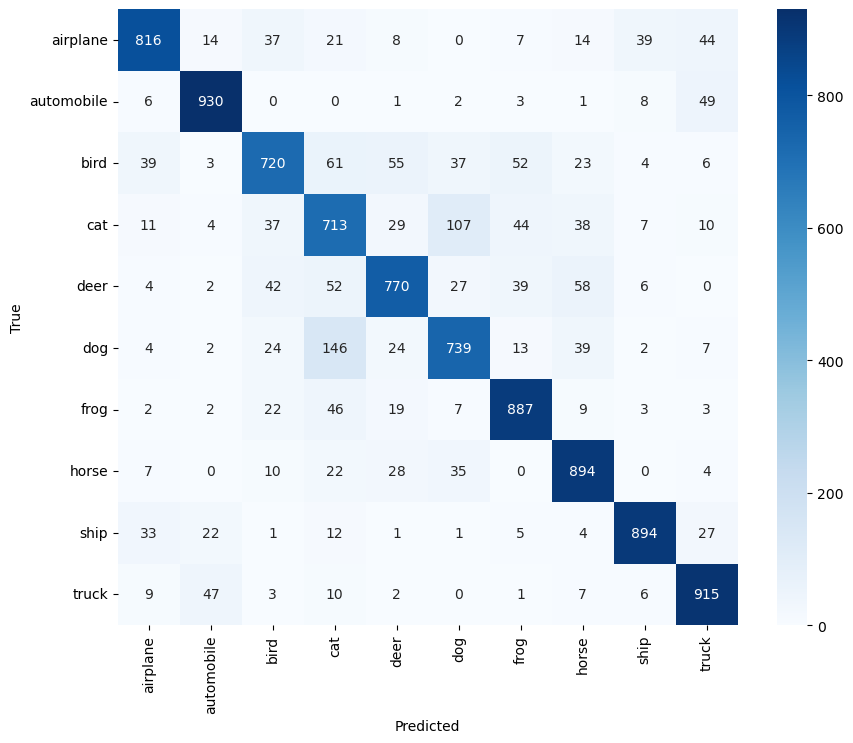

In [244]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Saving the model

In [250]:
# Save the model
model.save('CNN_CIFAR-10_model.keras')

# Testing the model

In [36]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Load the trained model
model = load_model("CNN_CIFAR-10_model.keras")

# Path to the folder with the 10 images
folder_path = "DL Project-Data folder with 10 images"

# True labels for the 10 images (adjusted as given)
true_labels = [0, 2, 7, 1, 3, 3, 6, 0, 8, 9]

# Process and predict
predicted_labels = []
for i, filename in enumerate(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    # Load and preprocess the image
    img = load_img(file_path, target_size=(32, 32))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the label
    predictions = model.predict(img_array)
    predicted_label_index = np.argmax(predictions)
    predicted_labels.append(predicted_label_index)

    # Display the prediction
    predicted_class = class_names[predicted_label_index]
    true_class = class_names[true_labels[i]]
    print(f"Image: {filename} -> Predicted: {predicted_class} | True: {true_class}")

# Calculate accuracy
accuracy = np.mean(np.array(predicted_labels) == np.array(true_labels))
print(f"\nAccuracy on these 10 images: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Image: airplane.jpg -> Predicted: Airplane | True: Airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: bird.jpg -> Predicted: Bird | True: Bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: caballo.jpeg -> Predicted: Horse | True: Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: car.jpg -> Predicted: Automobile | True: Automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: cat.jpeg -> Predicted: Bird | True: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: cat.jpg -> Predicted: Dog | True: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: frog.jpg -> Predicted: Frog | True: Frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: plane.jpg -> Predicted: Airplane | True: Airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: ship.jpg -> Predicted: Ship | True: Ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image: truck.jpg -> Predicted: Truck | True: Truck

Accuracy on these 10 images: 80.00%
